In [1]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

# To perform statistical analysis
import scipy.stats as stats

%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

# To build logistic regression model
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [2]:
hr = pd.read_csv("hr_data.csv")

In [3]:
df=hr.copy()

In [4]:
df.shape

(14999, 11)

There are 14999 employeed details in our dataset called 'hr_data' in which all the employees are compared with 10 attributes.

In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0,0.38,0.53,2,157.0,3.0,0,yes,0,NaN,sales,low
1,0.80,0.86,5,262.0,6.0,0,yes,0,yes,sales,medium
2,0.11,0.88,7,272.0,4.0,0,yes,0,NaN,sales,medium
3,0.72,0.87,5,223.0,5.0,0,yes,0,NaN,sales,low
4,0.37,0.52,2,NaN,NaN,0,yes,0,no,sales,low


first 5 entries of the dataset.

In [6]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
14994,0.40,0.57,2,151.0,3.0,0,yes,0,NaN,support,low
14995,0.37,0.48,2,160.0,3.0,0,yes,0,NaN,support,low
14996,0.37,0.53,2,143.0,3.0,0,yes,0,NaN,support,low
14997,0.11,0.96,6,280.0,4.0,0,yes,0,NaN,support,low
14998,0.37,0.52,2,158.0,3.0,0,yes,0,NaN,support,low


last 5 entries of the data set.

In [7]:
df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
14499,0.82,0.91,5,232.0,5.0,0,yes,0,NaN,technical,low
2222,0.26,0.63,6,100.0,4.0,0,no,0,NaN,sales,medium
2219,0.28,0.55,4,208.0,4.0,0,no,0,NaN,marketing,medium
2160,0.46,0.69,2,159.0,2.0,0,no,0,NaN,sales,low
13551,0.77,0.54,4,139.0,3.0,1,no,0,NaN,IT,low
10842,0.71,0.68,5,226.0,3.0,0,no,0,NaN,technical,low
10856,0.78,0.40,4,145.0,5.0,1,no,1,NaN,sales,medium
7479,0.65,0.97,3,198.0,3.0,0,no,0,NaN,RandD,low
32,0.40,0.51,2,145.0,3.0,0,yes,0,NaN,hr,low
5861,0.14,0.74,6,160.0,5.0,0,no,0,NaN,technical,medium


Sample of 10 random entries from dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14631 non-null  float64
 4   time_spend_company     14848 non-null  float64
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  object 
 7   promotion_last_5years  14999 non-null  int64  
 8   is_smoker              235 non-null    object 
 9   department             14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 1.3+ MB


In [9]:
df.rename(
    columns={
        "average_montly_hours":"average_monthly_hours"
    },
    inplace=True,
)
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0,0.38,0.53,2,157.0,3.0,0,yes,0,NaN,sales,low
1,0.80,0.86,5,262.0,6.0,0,yes,0,yes,sales,medium
2,0.11,0.88,7,272.0,4.0,0,yes,0,NaN,sales,medium
3,0.72,0.87,5,223.0,5.0,0,yes,0,NaN,sales,low
4,0.37,0.52,2,NaN,NaN,0,yes,0,no,sales,low


1. Missing values in average_monthly_hours, time_spend_company and is_smoker.
2. Department and salary has to be converted into category.
3. work_accident can be converted into binary as it has only two values, 0 for no accidents and 1 for accident.
4. Similarly, left can be converted into binary as its values are 0 for the employee who is still working in the company and 1 for employees who have already left.
5. average_monthly_hours depicts number of hours an employee is working in a month so it can be changed from float to int.

In [10]:
df.describe(include = 'all').round(2).T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,NaN,NaN,NaN,0.61,0.25,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,NaN,NaN,NaN,0.72,0.17,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,NaN,NaN,NaN,3.8,1.23,2.0,3.0,4.0,5.0,7.0
average_monthly_hours,14631.0,NaN,NaN,NaN,200.96,50.0,96.0,156.0,200.0,245.0,310.0
time_spend_company,14848.0,NaN,NaN,NaN,3.49,1.46,2.0,3.0,3.0,4.0,10.0
work_accident,14999.0,NaN,NaN,NaN,0.14,0.35,0.0,0.0,0.0,0.0,1.0
left,14999,2,no,11428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
promotion_last_5years,14999.0,NaN,NaN,NaN,0.02,0.14,0.0,0.0,0.0,0.0,1.0
is_smoker,235,2,no,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN
department,14999,10,sales,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observations:
1. The maximum satisfaction level obtained by the employee is given as 1 and the minimum is 0.09.
2. The maximum no. of projects done by an employee within the company is 7 and min is 2.
3. The highest an employee got in his last evaluation is 1 and min is 0.36.
4. The employee with highest average hours worked monthly will be 310 while the least hours spent is 96.
5. On the average, employees spend 3.5 years with the company.
6. This data contains most of its information of employees from sales department.
7. most of the employees in the dataset has a salary category of low.

In [11]:
df.left.value_counts()

no     11428
yes     3571
Name: left, dtype: int64

The data consists more information on the people who haven't left and not those who left the company.

In [12]:
df.department = df.department.astype('category')

In [13]:
df.salary = df.salary.astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_monthly_hours  14631 non-null  float64 
 4   time_spend_company     14848 non-null  float64 
 5   work_accident          14999 non-null  int64   
 6   left                   14999 non-null  object  
 7   promotion_last_5years  14999 non-null  int64   
 8   is_smoker              235 non-null    object  
 9   department             14999 non-null  category
 10  salary                 14999 non-null  category
dtypes: category(2), float64(4), int64(3), object(2)
memory usage: 1.1+ MB


## Treating missing values

In [15]:
df["average_monthly_hours"].unique()


array([157., 262., 272., 223.,  nan, 247., 259., 224., 142., 135., 305.,
       234., 148., 137., 143., 160., 255., 282., 147., 304., 139., 158.,
       242., 239., 128., 134., 145., 140., 246., 126., 306., 152., 269.,
       127., 281., 276., 182., 273., 132., 307., 309., 225., 226., 308.,
       244., 286., 161., 153., 264., 277., 275., 149., 295., 151., 249.,
       232., 130., 291., 129., 155., 265., 279., 284., 221., 154., 150.,
       267., 257., 177., 144., 258., 263., 251., 133., 216., 300., 138.,
       260., 183., 250., 292., 283., 245., 256., 278., 240., 301., 243.,
       296., 274., 164., 146., 261., 285., 141., 297., 156., 287., 219.,
       254., 228., 294., 131., 252., 236., 159., 270., 289., 298., 192.,
       248., 266., 233., 268., 231., 253., 136., 302., 271., 290., 235.,
       238., 293., 241., 218., 229., 199., 180., 195., 237., 227., 172.,
       206., 181., 217., 310., 214., 198., 211., 222., 213., 202., 184.,
       204., 288., 220., 299., 303., 212., 196., 17

In [16]:
df['average_monthly_hours'].fillna(0, inplace =True)

In [17]:
df["average_monthly_hours"].unique()

array([157., 262., 272., 223.,   0., 247., 259., 224., 142., 135., 305.,
       234., 148., 137., 143., 160., 255., 282., 147., 304., 139., 158.,
       242., 239., 128., 134., 145., 140., 246., 126., 306., 152., 269.,
       127., 281., 276., 182., 273., 132., 307., 309., 225., 226., 308.,
       244., 286., 161., 153., 264., 277., 275., 149., 295., 151., 249.,
       232., 130., 291., 129., 155., 265., 279., 284., 221., 154., 150.,
       267., 257., 177., 144., 258., 263., 251., 133., 216., 300., 138.,
       260., 183., 250., 292., 283., 245., 256., 278., 240., 301., 243.,
       296., 274., 164., 146., 261., 285., 141., 297., 156., 287., 219.,
       254., 228., 294., 131., 252., 236., 159., 270., 289., 298., 192.,
       248., 266., 233., 268., 231., 253., 136., 302., 271., 290., 235.,
       238., 293., 241., 218., 229., 199., 180., 195., 237., 227., 172.,
       206., 181., 217., 310., 214., 198., 211., 222., 213., 202., 184.,
       204., 288., 220., 299., 303., 212., 196., 17

In [18]:
df.loc[df.average_monthly_hours == 0, 'average_monthly_hours'] = df.average_monthly_hours.median()
df["average_monthly_hours"].unique()

array([157., 262., 272., 223., 197., 247., 259., 224., 142., 135., 305.,
       234., 148., 137., 143., 160., 255., 282., 147., 304., 139., 158.,
       242., 239., 128., 134., 145., 140., 246., 126., 306., 152., 269.,
       127., 281., 276., 182., 273., 132., 307., 309., 225., 226., 308.,
       244., 286., 161., 153., 264., 277., 275., 149., 295., 151., 249.,
       232., 130., 291., 129., 155., 265., 279., 284., 221., 154., 150.,
       267., 257., 177., 144., 258., 263., 251., 133., 216., 300., 138.,
       260., 183., 250., 292., 283., 245., 256., 278., 240., 301., 243.,
       296., 274., 164., 146., 261., 285., 141., 297., 156., 287., 219.,
       254., 228., 294., 131., 252., 236., 159., 270., 289., 298., 192.,
       248., 266., 233., 268., 231., 253., 136., 302., 271., 290., 235.,
       238., 293., 241., 218., 229., 199., 180., 195., 237., 227., 172.,
       206., 181., 217., 310., 214., 198., 211., 222., 213., 202., 184.,
       204., 288., 220., 299., 303., 212., 196., 17

In [19]:
df["time_spend_company"].unique()

array([ 3.,  6.,  4.,  5., nan,  2.,  8., 10.,  7.])

In [20]:
df['time_spend_company'].fillna(0, inplace =True)
df["time_spend_company"].unique()

array([ 3.,  6.,  4.,  5.,  0.,  2.,  8., 10.,  7.])

In [21]:
df.loc[df.time_spend_company == 0, 'time_spend_company'] = df.time_spend_company.median()
df["time_spend_company"].unique()

array([ 3.,  6.,  4.,  5.,  2.,  8., 10.,  7.])

In [22]:
df["left"].unique()

array(['yes', 'no'], dtype=object)

In [23]:
df.average_monthly_hours = df.average_monthly_hours.astype('int64')
df.time_spend_company = df.time_spend_company.astype('int64')



In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_monthly_hours  14999 non-null  int64   
 4   time_spend_company     14999 non-null  int64   
 5   work_accident          14999 non-null  int64   
 6   left                   14999 non-null  object  
 7   promotion_last_5years  14999 non-null  int64   
 8   is_smoker              235 non-null    object  
 9   department             14999 non-null  category
 10  salary                 14999 non-null  category
dtypes: category(2), float64(2), int64(5), object(2)
memory usage: 1.1+ MB


Treated missing values from average_monthly_hours and time_spend_company by replacing Nan values to its median value(since they are int type).
Then type of the above attributes are changed to int from float as they depict number of hours and number of years employees spent in the company respectively.

In [25]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,NaN,NaN,NaN,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,NaN,NaN,NaN,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,NaN,NaN,NaN,3.803054,1.232592,2.0,3.0,4.0,5.0,7.0
average_monthly_hours,14999.0,NaN,NaN,NaN,200.861257,49.388851,96.0,156.0,197.0,244.0,310.0
time_spend_company,14999.0,NaN,NaN,NaN,3.489166,1.452451,2.0,3.0,3.0,4.0,10.0
work_accident,14999.0,NaN,NaN,NaN,0.14461,0.351719,0.0,0.0,0.0,0.0,1.0
left,14999,2,no,11428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
promotion_last_5years,14999.0,NaN,NaN,NaN,0.021268,0.144281,0.0,0.0,0.0,0.0,1.0
is_smoker,235,2,no,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN
department,14999,10,sales,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df["is_smoker"].unique()

array([nan, 'yes', 'no'], dtype=object)

In [27]:
df=df.fillna(df.mode().iloc[0])

In [28]:
df["is_smoker"].unique()

array(['no', 'yes'], dtype=object)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_monthly_hours  14999 non-null  int64   
 4   time_spend_company     14999 non-null  int64   
 5   work_accident          14999 non-null  int64   
 6   left                   14999 non-null  object  
 7   promotion_last_5years  14999 non-null  int64   
 8   is_smoker              14999 non-null  object  
 9   department             14999 non-null  category
 10  salary                 14999 non-null  category
dtypes: category(2), float64(2), int64(5), object(2)
memory usage: 1.1+ MB


We have replaced the missing entries from is_smoker attribute with the mode as it is a categorial type.

In [30]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
is_smoker                0
department               0
salary                   0
dtype: int64

There are no missing variables left

In [31]:
df = df.replace({'left': {'yes': 1, 'no': 0}})

In [32]:
df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
5496,0.65,0.56,3,259,3,0,0,0,no,marketing,medium
14045,0.53,1.00,3,164,4,0,0,0,no,IT,medium
8479,0.73,0.72,5,178,2,0,0,0,no,management,low
9324,0.57,0.66,4,158,2,0,0,0,no,sales,low
3093,0.81,0.79,5,135,3,0,0,0,no,technical,low
4145,0.54,0.67,2,129,3,1,0,0,no,sales,low
7024,0.57,0.97,5,126,5,0,0,0,no,sales,medium
9782,0.51,0.79,3,197,3,0,0,0,no,sales,medium
1668,0.82,0.94,5,232,5,1,1,0,no,IT,medium
5021,0.66,0.99,4,197,3,0,0,0,no,IT,low


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_monthly_hours  14999 non-null  int64   
 4   time_spend_company     14999 non-null  int64   
 5   work_accident          14999 non-null  int64   
 6   left                   14999 non-null  int64   
 7   promotion_last_5years  14999 non-null  int64   
 8   is_smoker              14999 non-null  object  
 9   department             14999 non-null  category
 10  salary                 14999 non-null  category
dtypes: category(2), float64(2), int64(6), object(1)
memory usage: 1.1+ MB


-  Changed Dependent variable, Left from objet type to numerical type for further analysis i.e., all 'yes's are convereted to '1' and 'no's are '0'.

## EDA

### Univariant Analysis

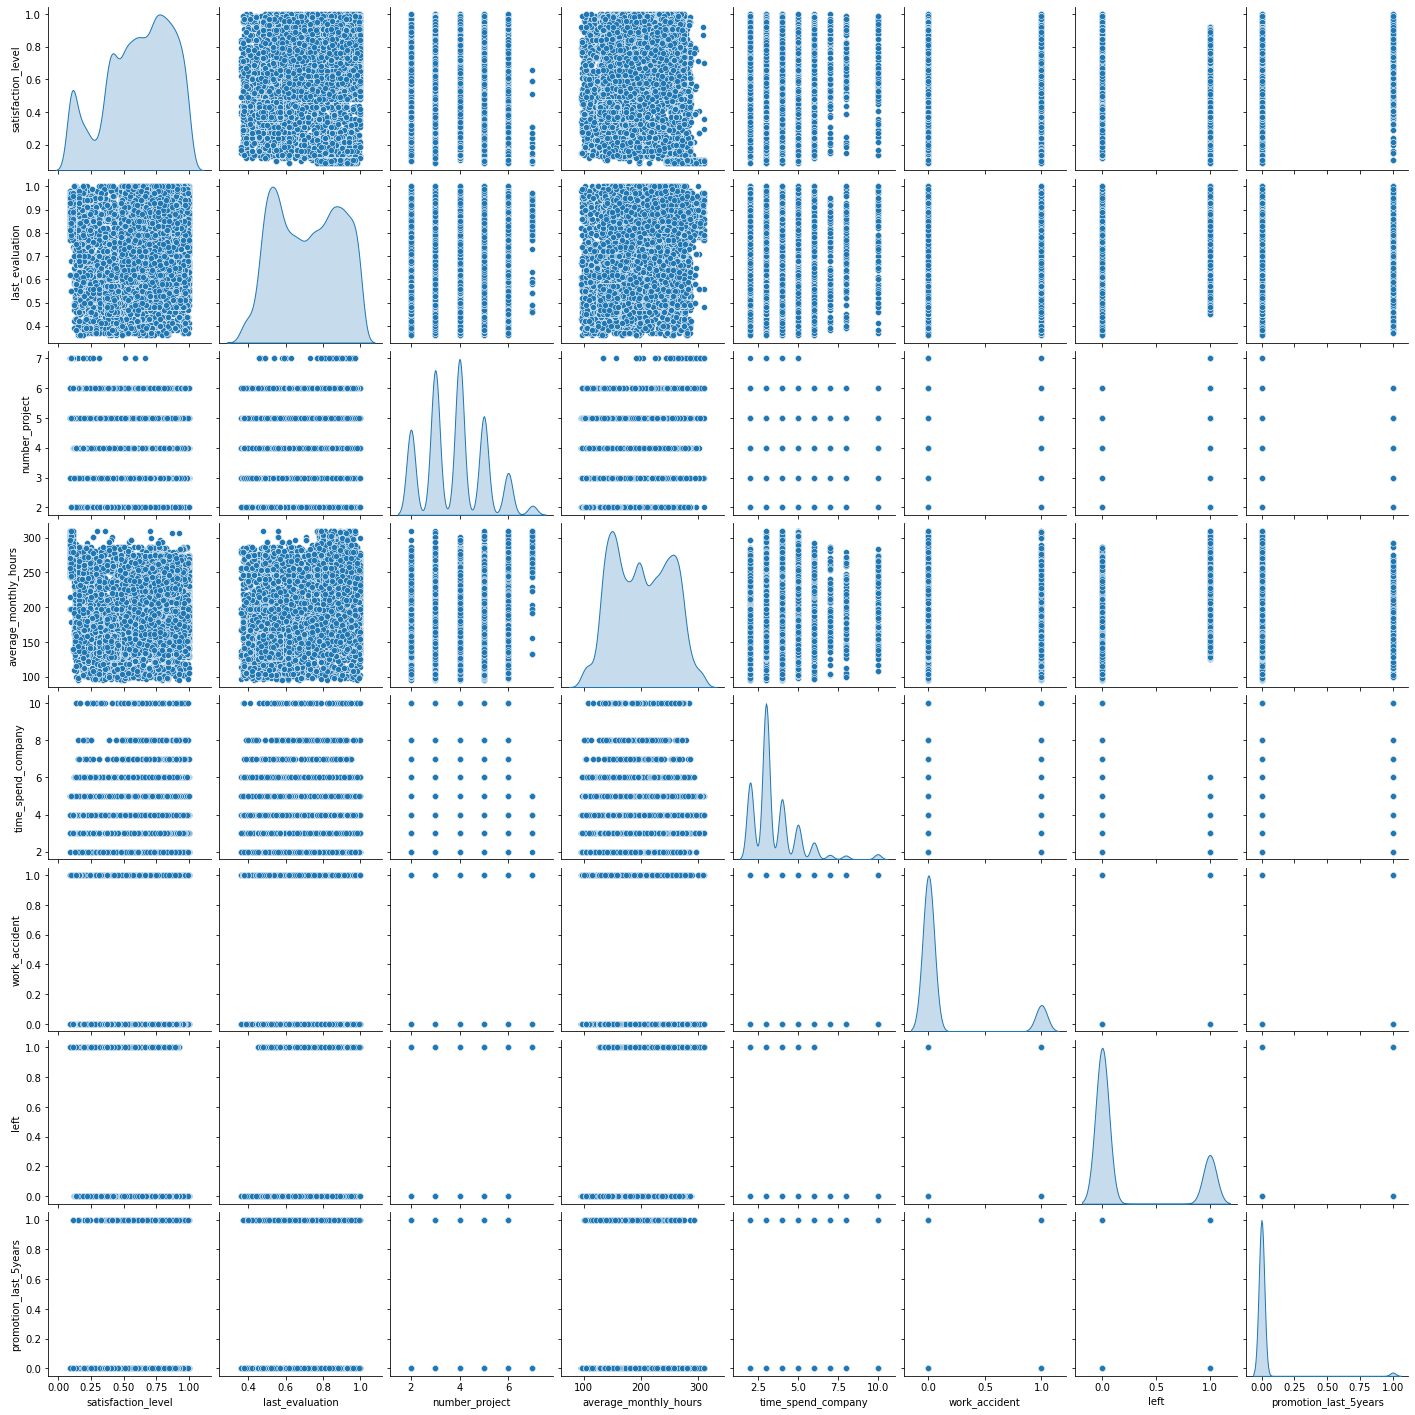

In [34]:
sns.pairplot(df, diag_kind="kde")
plt.show()

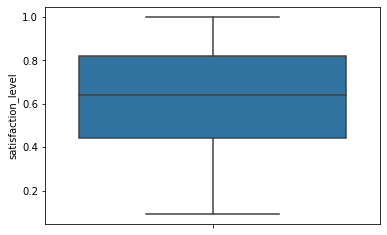

In [35]:
sns.boxplot(y='satisfaction_level',data=df)
plt.show()

   - The average satisfaction level of the employees is at 0.65.
   - Most of the people's satisfaction level lies between 0.4-0.8

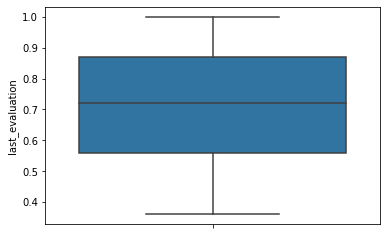

In [36]:
sns.boxplot(y='last_evaluation',data=df)
plt.show()

- The average of the last_evaluation is 0.7 approx.

In [37]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

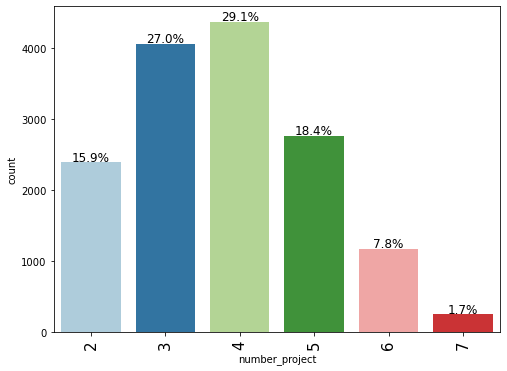

In [38]:
labeled_barplot(df, "number_project", perc=True)

#### observations:
- There are very less number employees who have worked on 7 projects in this comapany.
- most of the employees have worked on 4 projects, followed by people who worked on 3 and then those who worked on 5 projects.

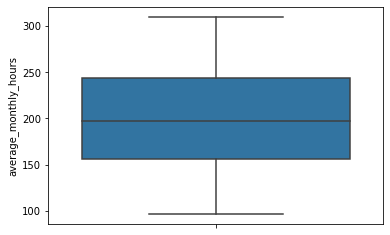

In [39]:
sns.boxplot(y='average_monthly_hours',data=df)
plt.show()

The average employees spent in the company per month in an hourly basis lies between 150-250.

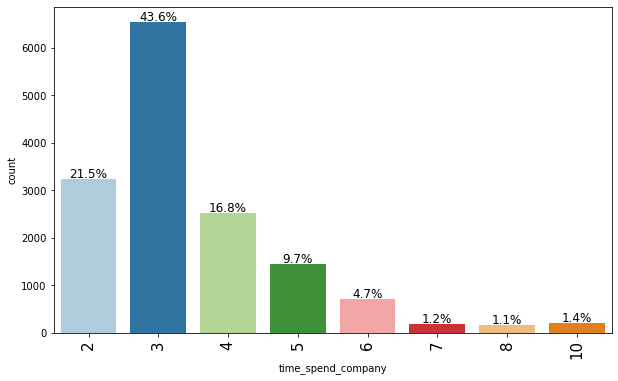

In [40]:
labeled_barplot(df, "time_spend_company", perc=True)

#### Observations:
- Nearly 43.6% people spent the company for 3 years.
- 3.7% of people are staying for a long time in the company which has to improve.
- 21.5% of people after staying for 2 years with the company.
- The company has to improve satisfaction of their employees and make them stay for long time which is improving the loyalty among the employees.

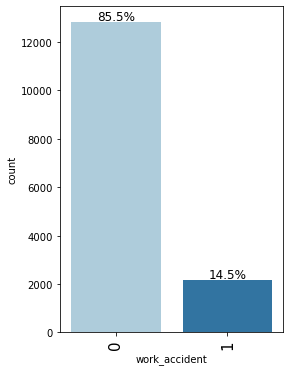

In [41]:
labeled_barplot(df, "work_accident", perc=True)

The company is doing good job in maintaing less number of work accidents.

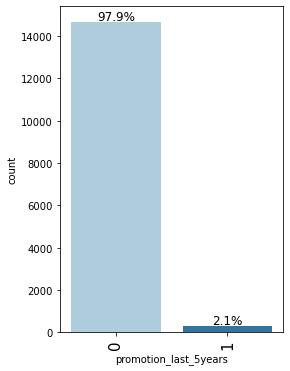

In [42]:
labeled_barplot(df, "promotion_last_5years", perc=True)

#### Observations:
- As we can see company has given out only 2.1% of their employees promotions.
- It is very important for every employee to feel appriciated and recognised within the company. By giving more promotions the company can show that they care about their employees hardwork which might improve in building trust between the company and employees and make them stay long with the company.

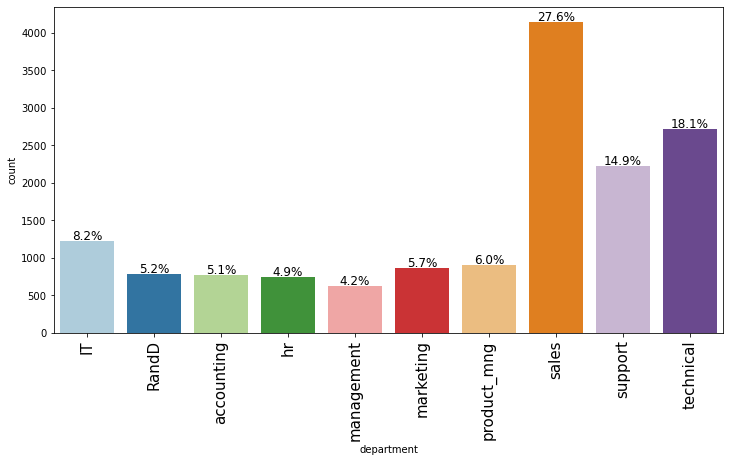

In [43]:
labeled_barplot(df, "department", perc=True)

#### Observations:
Most of the data is from sales department.
Next is the technical department followed by support.
The least are from Management and Hr.
This might also mean that employees in these top departments are feeling recognised or wanting to move for a better job.

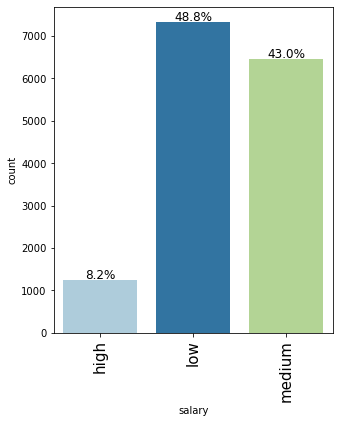

In [44]:
labeled_barplot(df, "salary", perc=True)

#### Observations:
- Most people from the data are from low salary range.
- Least people are from high salary ranges which is similar to above barplot depecting the departments. The highest departments are the ones which has the least salaries in a company.

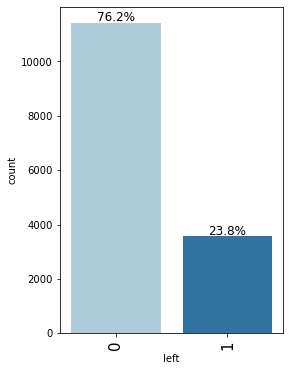

In [45]:
labeled_barplot(df, "left", perc=True)

- According to the above barplot, most of the people have not left the company yet.
- only 23.8% of employee who left the company are in this dataset.

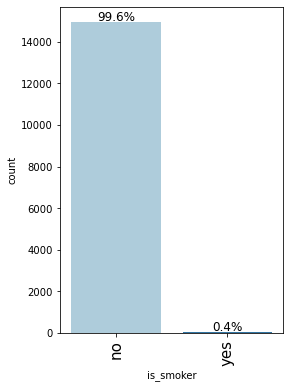

In [46]:
labeled_barplot(df, "is_smoker", perc=True)

- only 0.4% of employees who accepted that they smoke.
- 99.6% employees, either said they do smoking or they haven't mention any so we assumed that they are not smoking.

## Bivariant  Analysis

[Text(0.5, 1.0, 'left vs Satisfaction level')]

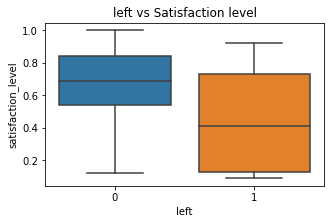

In [47]:
plt.figure(figsize=(5, 3))
sns.boxplot(x="left", y="satisfaction_level", data=df).set(title="left vs Satisfaction level")

#### Observations:
- We can understand that the poeple with less satisfaction level are more tend to leave the company.

[Text(0.5, 1.0, 'Left Vs average monthly hours')]

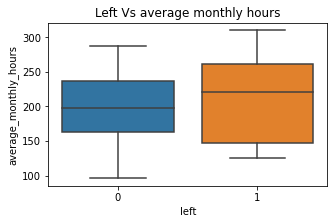

In [48]:
plt.figure(figsize=(5, 3))
sns.boxplot(x="left", y="average_monthly_hours", data=df).set(title="Left Vs average monthly hours")

#### Observations:
- We can say that people with more average hours working in the company have more people who left the company.

In [49]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

left                0     1    All
number_project                    
All             11428  3571  14999
2                 821  1567   2388
6                 519   655   1174
5                2149   612   2761
4                3956   409   4365
7                   0   256    256
3                3983    72   4055
------------------------------------------------------------------------------------------------------------------------


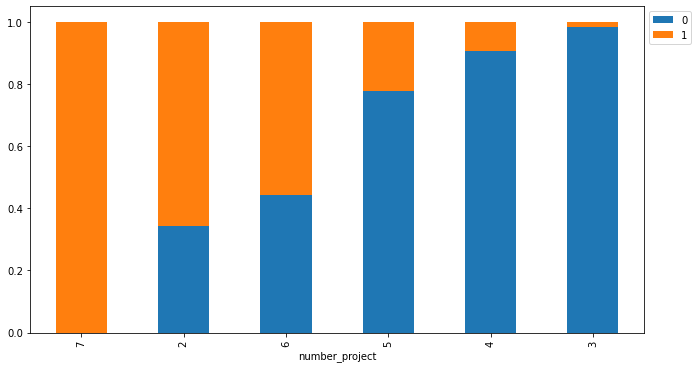

In [50]:
stacked_barplot(df, "number_project", "left")

#### observations:
- more people tend to leave the company who have worked in 7 projects, which means people are facing more pressure due to multiple projects which is making them to leave the company.
- We can see that even people working on just 2 projects are also leaving the company, which means they might be feeling less appreciated and worthy.
- But we can see less people are tend to leave the company when worked in 3 projects. People are feeling less pressured at the same time they are feeling it has enough projects to show their potential.

left                    0     1    All
time_spend_company                    
All                 11428  3571  14999
3                    4904  1630   6534
4                    1654   871   2525
5                     636   814   1450
6                     504   203    707
2                    3174    53   3227
7                     186     0    186
8                     158     0    158
10                    212     0    212
------------------------------------------------------------------------------------------------------------------------


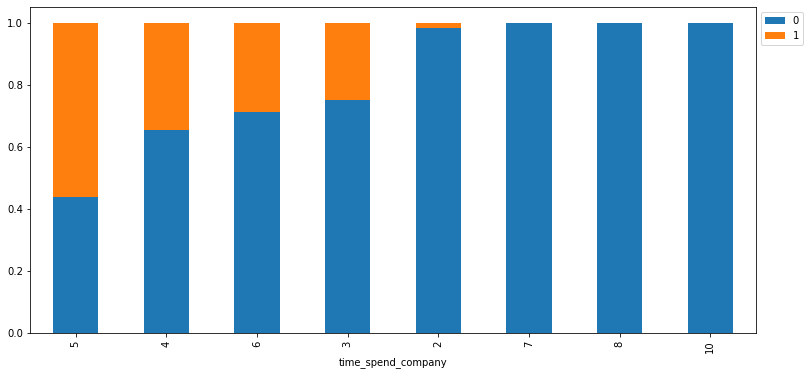

In [51]:
stacked_barplot(df, "time_spend_company", "left")

#### Observations:
- More people tend to leave the company after completion of their 5 years.
- people who stay more than 7 years tend to stay in the company as they have built loyalty towards the company.

left               0     1    All
work_accident                    
All            11428  3571  14999
0               9428  3402  12830
1               2000   169   2169
------------------------------------------------------------------------------------------------------------------------


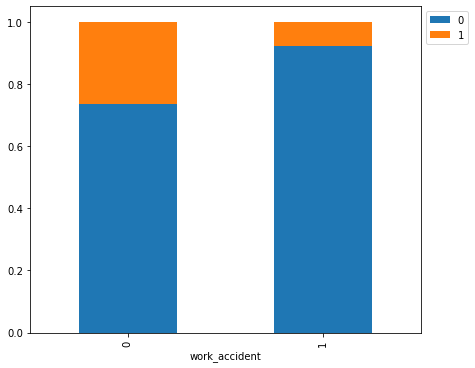

In [52]:
stacked_barplot(df, "work_accident", "left")

#### observations:
- People with no work accidents are trying to leave the company rather than people who faced work accidents.

left                       0     1    All
promotion_last_5years                    
All                    11428  3571  14999
0                      11128  3552  14680
1                        300    19    319
------------------------------------------------------------------------------------------------------------------------


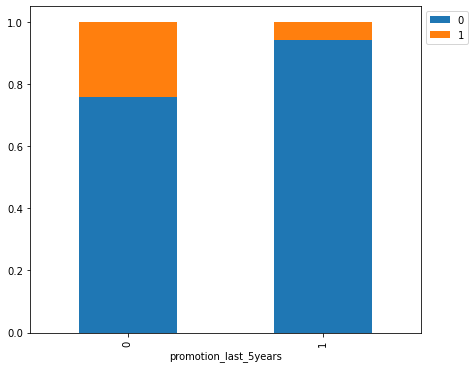

In [53]:
stacked_barplot(df, "promotion_last_5years", "left")

#### Observations:
- People who got appriciated through a promotion is tend to leave a company rather than who are not appreciated.

left             0     1    All
department                     
All          11428  3571  14999
sales         3126  1014   4140
technical     2023   697   2720
support       1674   555   2229
IT             954   273   1227
hr             524   215    739
accounting     563   204    767
marketing      655   203    858
product_mng    704   198    902
RandD          666   121    787
management     539    91    630
------------------------------------------------------------------------------------------------------------------------


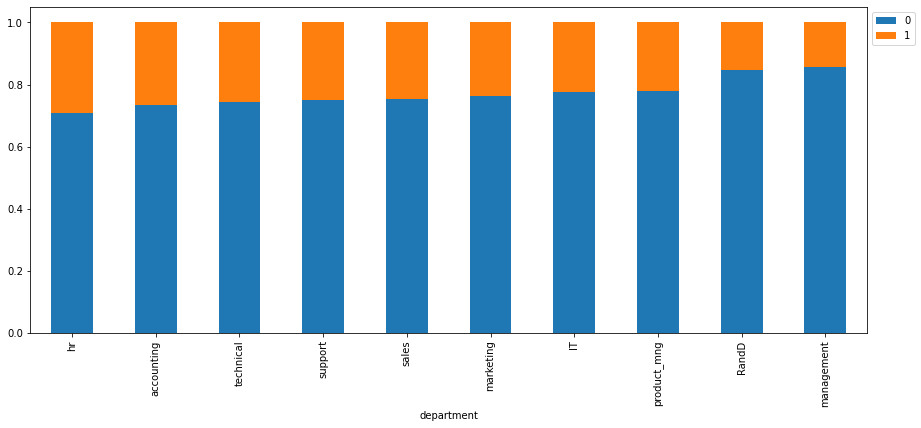

In [54]:
stacked_barplot(df, "department", "left")

#### Observations:
- Employees in hr department are tend to leave the company.
- Employees in the management depratment tend to stay with the company as they might like the job culture in the company.

left        0     1    All
salary                    
All     11428  3571  14999
low      5144  2172   7316
medium   5129  1317   6446
high     1155    82   1237
------------------------------------------------------------------------------------------------------------------------


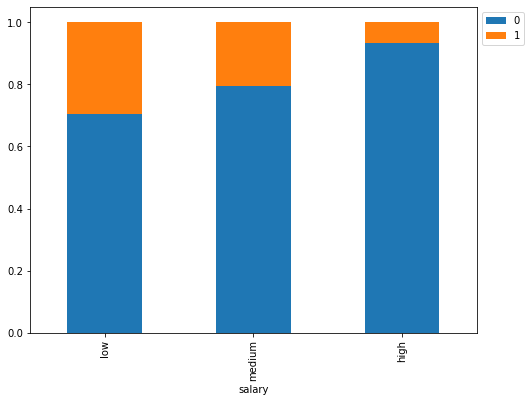

In [55]:
stacked_barplot(df, "salary", "left")

#### Observations:
- people with high salary does not leave the company as they might get more than this in the market. And they might be feeling satisfied.
- people with low salary want to move out of the company to improve their career options.

left           0     1    All
is_smoker                    
All        11428  3571  14999
no         11380  3564  14944
yes           48     7     55
------------------------------------------------------------------------------------------------------------------------


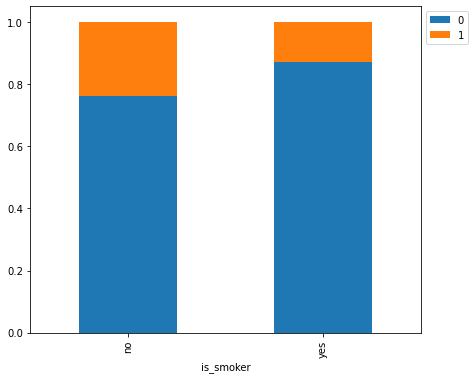

In [56]:
stacked_barplot(df, "is_smoker", "left")

#### Observations
- more percentage of people who smoke are tend to leave the company than people who are not smoking.
- But this cannot be sure since 99% people are non smokers.

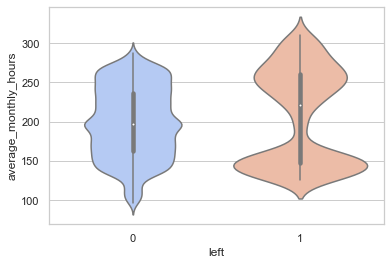

In [57]:
import seaborn as sns
sns.set_theme(style="whitegrid")
Ax = sns.violinplot(x="left", y="average_monthly_hours", data=df, palette="coolwarm")

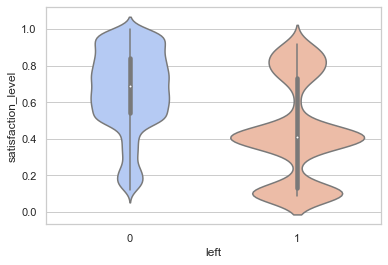

In [58]:
Ax = sns.violinplot(x="left", y="satisfaction_level", data=df, palette="coolwarm")

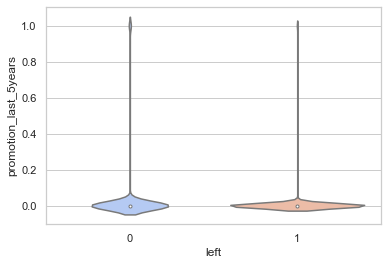

In [59]:
Ax = sns.violinplot(x="left", y="promotion_last_5years", data=df, palette="coolwarm")

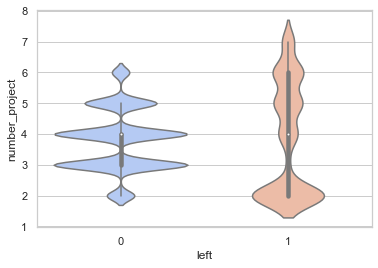

In [60]:
Ax = sns.violinplot(x="left", y="number_project", data=df, palette="coolwarm")

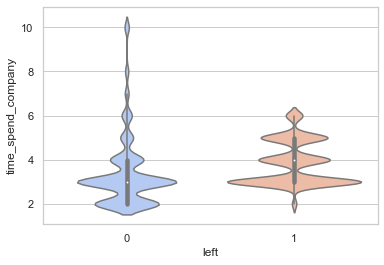

In [61]:
Ax = sns.violinplot(x="left", y="time_spend_company", data=df, palette="coolwarm")

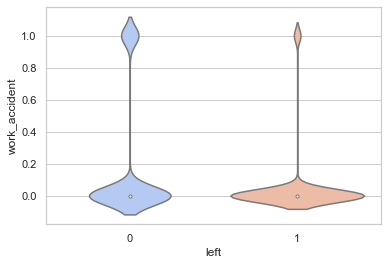

In [62]:
Ax = sns.violinplot(x="left", y="work_accident", data=df, palette="coolwarm")

In [63]:
crosstab = pd.crosstab(
    df["left"], df["average_monthly_hours"]
)  

Ho = "average monthly hours has no effect on people leaving the company"  # Stating the Null Hypothesis
Ha = "average monthly hours has effect on people leaving the company"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

average monthly hours has effect on people leaving the company as the p_value (0.0) < 0.05


In [64]:
crosstab = pd.crosstab(
    df["left"], df["satisfaction_level"]
)  

Ho = "satisfaction_level has no effect on people leaving the company"  # Stating the Null Hypothesis
Ha = "satisfaction_level has effect on people leaving the company"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

satisfaction_level has effect on people leaving the company as the p_value (0.0) < 0.05


In [65]:
crosstab = pd.crosstab(
    df["left"], df["promotion_last_5years"]
)  

Ho = "promotion_last_5years has no effect on people leaving the company"  # Stating the Null Hypothesis
Ha = "promotion_last_5years has effect on people leaving the company"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

promotion_last_5years has effect on people leaving the company as the p_value (0.0) < 0.05


In [66]:
crosstab = pd.crosstab(
    df["left"], df["department"]
)  

Ho = "Department has no effect on people leaving the company"  # Stating the Null Hypothesis
Ha = "Department has effect on people leaving the company"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

Department has effect on people leaving the company as the p_value (0.0) < 0.05


In [67]:
crosstab = pd.crosstab(
    df["left"], df["number_project"]
)  

Ho = "number_project has no effect on people leaving the company"  # Stating the Null Hypothesis
Ha = "number_project has effect on people leaving the company"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

number_project has effect on people leaving the company as the p_value (0.0) < 0.05


In [68]:
crosstab = pd.crosstab(
    df["left"], df["time_spend_company"]
)  

Ho = "time_spend_company has no effect on people leaving the company"  # Stating the Null Hypothesis
Ha = "time_spend_company has effect on people leaving the company"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

time_spend_company has effect on people leaving the company as the p_value (0.0) < 0.05


In [69]:
crosstab = pd.crosstab(
    df["left"], df["work_accident"]
)  

Ho = "Work_accident has no effect on people leaving the company"  # Stating the Null Hypothesis
Ha = "Work_accident has effect on people leaving the company"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

Work_accident has effect on people leaving the company as the p_value (0.0) < 0.05


In [70]:
crosstab = pd.crosstab(
    df["left"], df["salary"]
)  

Ho = "salary has no effect on people leaving the company"  # Stating the Null Hypothesis
Ha = "salary has effect on people leaving the company"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

salary has effect on people leaving the company as the p_value (0.0) < 0.05


In [71]:
crosstab = pd.crosstab(
    df["left"], df["is_smoker"]
)  

Ho = "is_smoker has no effect on people leaving the company"  # Stating the Null Hypothesis
Ha = "is_smoker has effect on people leaving the company"  # Stating the Alternate Hypothesis

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

is_smoker has no effect on people leaving the company as the p_value (0.076) > 0.05


As per the above statistics analysis, it shows that all of them are effecting the poeple leaving the company except whether they are smoker or not. 
But we will furher analysis to confirm our results.

## Multivariante analaysis

### Correlation

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_monthly_hours  14999 non-null  int64   
 4   time_spend_company     14999 non-null  int64   
 5   work_accident          14999 non-null  int64   
 6   left                   14999 non-null  int64   
 7   promotion_last_5years  14999 non-null  int64   
 8   is_smoker              14999 non-null  object  
 9   department             14999 non-null  category
 10  salary                 14999 non-null  category
dtypes: category(2), float64(2), int64(6), object(1)
memory usage: 1.1+ MB


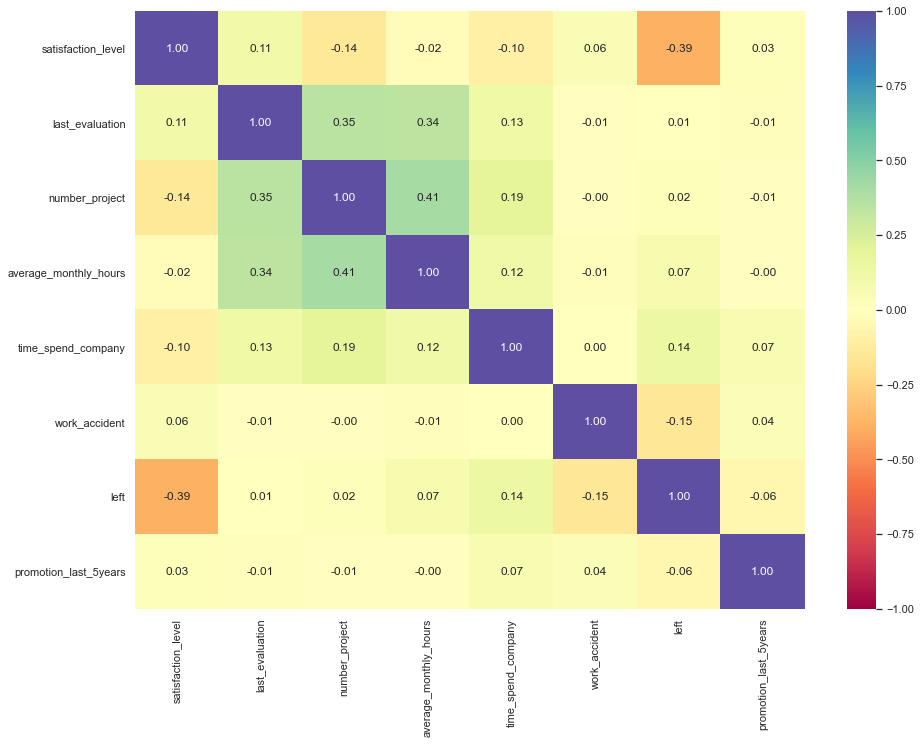

In [73]:
# Studying correlation among numeric variables
plt.figure(figsize=(15, 11))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

COrrelation of all numeric attriutes
- The more projects employees are working on the less satisfied they are, since they have a negative correlation.
- The last_evaluatio has most positive correlation with satisfaction i.e., employees who has higher ratings in their last evaluation has more work satisfaction.
- work accidents show it has a positive correlation which is confusing. To understand better about other attributes, we are going to make non-numerical varibals numerical by replacing those with dummy varibales.
- employees leaving the company has a negative corelation with the satisfaction_level of the employee i.e., as the satisfaction level increases, employees want to stay with the company increases.
- Remaining all attributes do corelate with the peopole leaving the company but the corelation is not too high.

## Missing Value Treatment

In [74]:
# Checking which columns have zero values
(df == 0).sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_monthly_hours        0
time_spend_company           0
work_accident            12830
left                     11428
promotion_last_5years    14680
is_smoker                    0
department                   0
salary                       0
dtype: int64

## Creating dummy variables

In [75]:
copy = pd.get_dummies(df)

In [76]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   last_evaluation         14999 non-null  float64
 2   number_project          14999 non-null  int64  
 3   average_monthly_hours   14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   work_accident           14999 non-null  int64  
 6   left                    14999 non-null  int64  
 7   promotion_last_5years   14999 non-null  int64  
 8   is_smoker_no            14999 non-null  uint8  
 9   is_smoker_yes           14999 non-null  uint8  
 10  department_IT           14999 non-null  uint8  
 11  department_RandD        14999 non-null  uint8  
 12  department_accounting   14999 non-null  uint8  
 13  department_hr           14999 non-null  uint8  
 14  department_management   14999 non-null

There are no zero values in attributes which cannot have 0 in them.

In [77]:
copy.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_monthly_hours,14999.0,200.861257,49.388851,96.00,156.00,197.00,244.00,310.0
time_spend_company,14999.0,3.489166,1.452451,2.00,3.00,3.00,4.00,10.0
work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0
is_smoker_no,14999.0,0.996333,0.060446,0.00,1.00,1.00,1.00,1.0
is_smoker_yes,14999.0,0.003667,0.060446,0.00,0.00,0.00,0.00,1.0


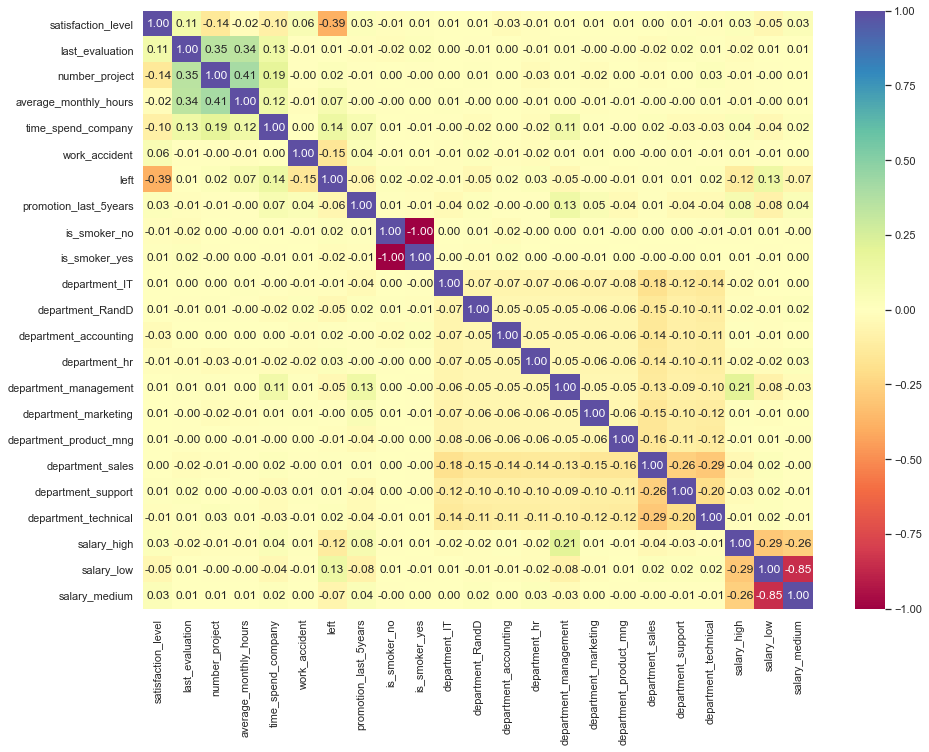

In [78]:
# Studying correlation among numeric variables
plt.figure(figsize=(15, 11))
sns.heatmap(copy.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

After creating variables for all quanlitative attributes, all of them are converted into quantitative values so that we can proceed with model building easily.

## Model Building

### Split Data

In [79]:
X = df.drop(["left"], axis=1)
Y = df["left"]

X = pd.get_dummies(X, drop_first=True)

# adding constant
X = sm.add_constant(X)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1)

print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 10499
Number of rows in test data = 4500


In [80]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_LogReg(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [81]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True).round(2))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True).round(2))

Percentage of classes in training set:
0    0.76
1    0.24
Name: left, dtype: float64
Percentage of classes in test set:
0    0.76
1    0.24
Name: left, dtype: float64


The Ratio of positive cases (left:1) to negative cases (left:0) is almost 25:75.

### Build Logistic Regression Model

In [82]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                10499
Model:                          Logit   Df Residuals:                    10479
Method:                           MLE   Df Model:                           19
Date:                Sun, 03 Jul 2022   Pseudo R-squ.:                  0.2215
Time:                        14:57:22   Log-Likelihood:                -4474.5
converged:                       True   LL-Null:                       -5747.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.5384      0.227     -6.785      0.000      -1.983      -1.094
satisfaction_level        -4.2266      0.119    -35.649      0.000      -4.459      -3.994
last

- is_smoker variable has p value more than 0.05 as we have seen before. Which means we can ignore this variable since it does not affect the dependent variable in any ways and perform regression analysis on remaining attributes.

In [83]:
del df["is_smoker"]
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,197,3,0,1,0,sales,low


Since is_smoker is deleted we can retry our regression analysis again.
So splitting the new data, without is_smoker attribute, and perform the analysis.

In [84]:
X = df.drop(["left"], axis=1)
Y = df["left"]

X = pd.get_dummies(X, drop_first=True)

# adding constant
X = sm.add_constant(X)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1)

print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 10499
Number of rows in test data = 4500


In [85]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_LogReg(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [86]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True).round(2))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True).round(2))

Percentage of classes in training set:
0    0.76
1    0.24
Name: left, dtype: float64
Percentage of classes in test set:
0    0.76
1    0.24
Name: left, dtype: float64


In [87]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                10499
Model:                          Logit   Df Residuals:                    10480
Method:                           MLE   Df Model:                           18
Date:                Sun, 03 Jul 2022   Pseudo R-squ.:                  0.2214
Time:                        14:57:22   Log-Likelihood:                -4475.1
converged:                       True   LL-Null:                       -5747.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.5420      0.227     -6.803      0.000      -1.986      -1.098
satisfaction_level        -4.2276      0.119    -35.659      0.000      -4.460      -3.995
last

### Checking model performance on training set

In [88]:
print("Training performance:")
model_performance_LogReg(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.797695,0.366707,0.62423,0.462006


In [89]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.3):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [
        f"{v1}\n{v2}\n{v3}"
        for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
    ]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")

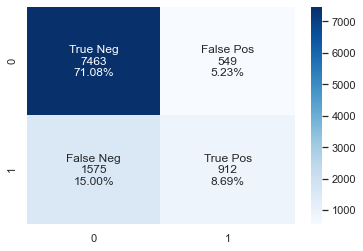

In [90]:
confusion_matrix_statsmodels(lg, X_train, y_train, threshold=0.5)

### Checking model performance on test set

In [91]:
print("Test performance:")
model_performance_LogReg(lg, X_test, y_test)

Test performance:


,Accuracy,Recall,Precision,F1
0,0.790444,0.387454,0.600858,0.471116


The training and test data performance are almost similar, which shows the model is not overfitting. Although, according to the low value of metrics, the model is underfitting. That means, the model can not give us a perfect result.
- The model is able to identify only 38% of employees who will leave the company.
- The model's prediction of job leavers is correct 60% of the time.
- The model is not balanced according to the F1 score: 47%.

##### Model evaluation
The model can make wrong predictions as:

- Predicting an employee would not leave the company and the employee would.
- Predicting an employee would leave the company and the employee would not.

##### Which case is more important?

- Predicting an employee would not leave the company and the employee would.

Identifying the employees who are leaving the company is a more important issue because in that case, the company will try to keep them; we want to have the least possible False Negative. So the most critical metric in this model for us is Recall. To improve our model, we should increase Recall by changing the threshold.

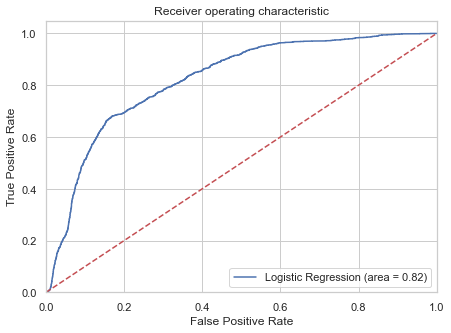

In [92]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, lg.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

The skill of the model is relatively good.

### Finding a good threshold

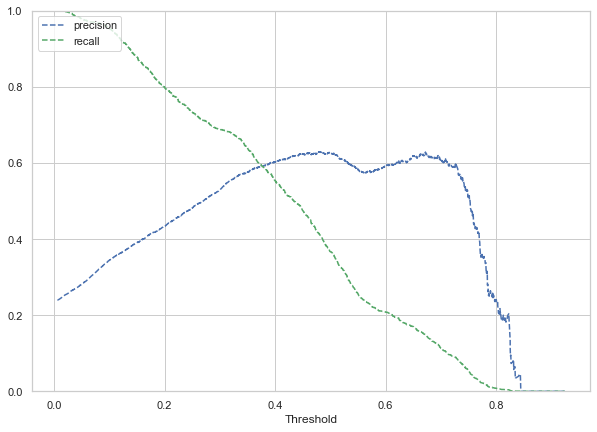

In [93]:
y_scores = lg.predict(X_train)
prec, rec, tre = precision_recall_curve(
    y_train,
    y_scores,
)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

It seems that Precision and Recall may be balanced at a threshold around 0.40.

In [94]:
print("Training performance:")
model_performance_LogReg(lg, X_train, y_train, threshold=0.40)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.807982,0.554081,0.603063,0.577536


The Recall still is not very high, so we can adjust the threshold lower to have a higher recall.

In [95]:
print("Training performance:")
model_performance_LogReg(lg, X_train, y_train, threshold=0.20)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.705877,0.798955,0.434317,0.56273


In [96]:
log_reg_model_train_perf_threshold_curve = model_performance_LogReg(
    lg, X_train, y_train, threshold=0.2
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.705877,0.798955,0.434317,0.56273


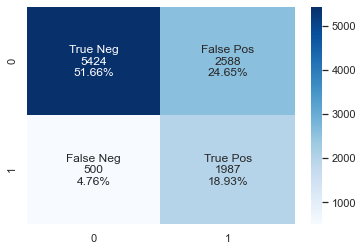

In [97]:
confusion_matrix_statsmodels(lg, X_train, y_train, threshold=0.2)

- Decreasing the Threshold resulted in a 24 percent increase in false positives. It is unimportant because the main priority is locating and retaining leaving employees.

In [98]:
log_reg_model_test_perf_threshold_curve = model_performance_LogReg(
    lg, X_test, y_test, threshold=0.2
)
print("test performance:")
log_reg_model_test_perf_threshold_curve

test performance:


,Accuracy,Recall,Precision,F1
0,0.703111,0.79428,0.43617,0.563113


The model with threshold = 0.2 is not overfitting and has high recall. The model will be able to flag 79% of employees will leave.

### Build Decision Tree Model

In [99]:
dTree = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Scoring the Decision Tree

In [100]:
print("Accuracy on training set : ", dTree.score(X_train, y_train))
print("Accuracy on test set : ", dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9773333333333334


### Confusion Matrix

In [101]:
def make_confusion_matrix(model, predictors, target):

    y_pred = model.predict(predictors)
    cm = metrics.confusion_matrix(target, y_pred)
    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [
        f"{v1}\n{v2}\n{v3}"
        for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
    ]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")

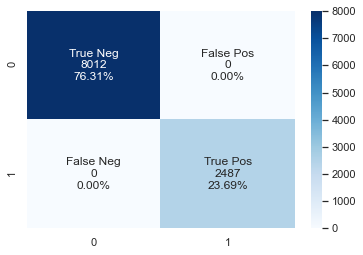

In [102]:
make_confusion_matrix(dTree, X_train, y_train)

The model is fitting the data perfectly as both FP and FN are approximately zero.

In [103]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [104]:
print("Training performance")
model_performance_classification(dTree, X_train, y_train)

Training performance


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


The results indicate that the Tree has fitted the Train data too well.

In [105]:
print("Test performance")
model_performance_classification(dTree, X_test, y_test)

Test performance


,Accuracy,Recall,Precision,F1
0,0.977333,0.952952,0.952952,0.952952


The Tree is overfitting the train data

### Visualizing the Decision Tree

In [106]:
feature_names = list(X.columns)
print(feature_names)

['const', 'satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 'work_accident', 'promotion_last_5years', 'department_RandD', 'department_accounting', 'department_hr', 'department_management', 'department_marketing', 'department_product_mng', 'department_sales', 'department_support', 'department_technical', 'salary_low', 'salary_medium']


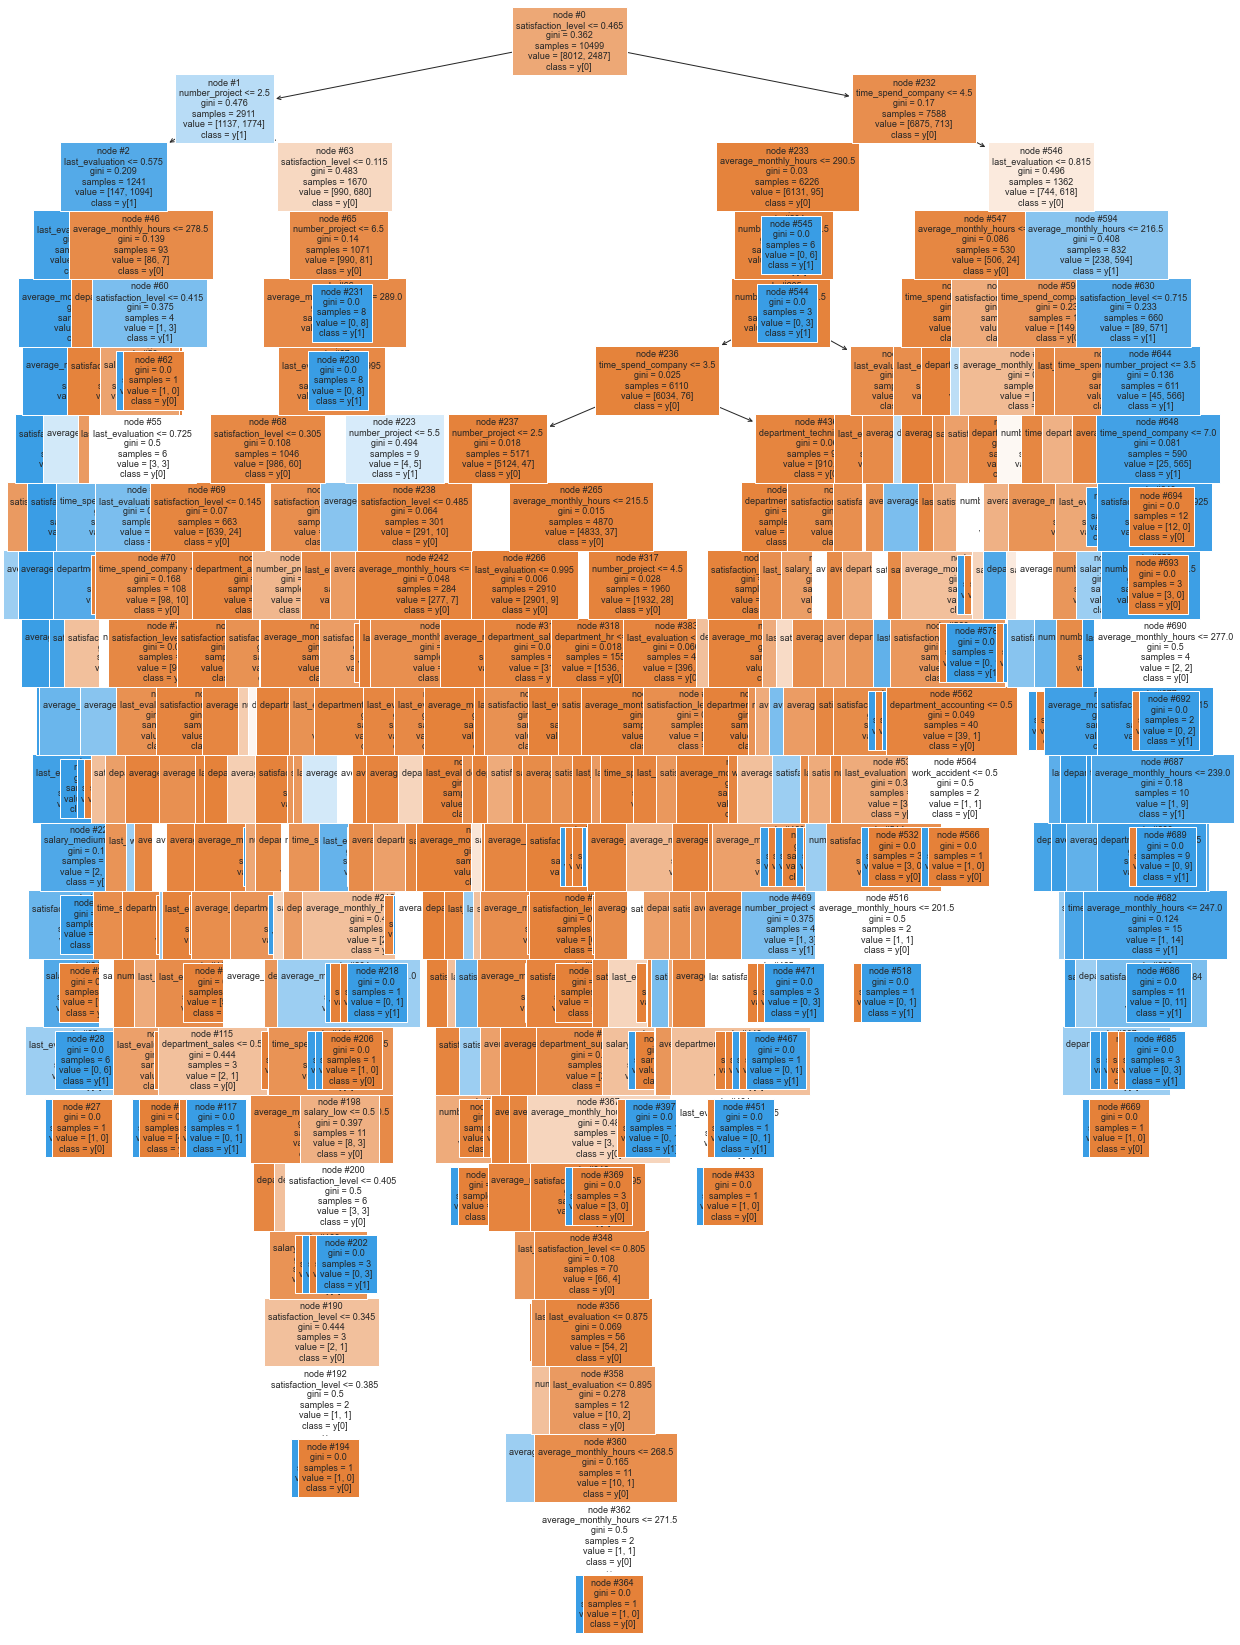

In [107]:
plt.figure(figsize=(20, 30))
tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [108]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree, feature_names=feature_names, show_weights=True))

|--- satisfaction_level <= 0.47
|   |--- number_project <= 2.50
|   |   |--- last_evaluation <= 0.57
|   |   |   |--- last_evaluation <= 0.44
|   |   |   |   |--- weights: [24.00, 0.00] class: 0
|   |   |   |--- last_evaluation >  0.44
|   |   |   |   |--- average_monthly_hours <= 125.50
|   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |   |--- average_monthly_hours >  125.50
|   |   |   |   |   |--- average_monthly_hours <= 163.50
|   |   |   |   |   |   |--- satisfaction_level <= 0.31
|   |   |   |   |   |   |   |--- satisfaction_level <= 0.18
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |--- satisfaction_level >  0.18
|   |   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- satisfaction_level >  0.31
|   |   |   |   |   |   |   |--- satisfaction_level <= 0.34
|   |   |   |   |   |   |   |   |--- average_monthly_hours <= 139.00
|   |   |   |   |   |   |   |   |   |--- weight

In [109]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dTree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                             Imp
satisfaction_level      0.511466
last_evaluation         0.140628
time_spend_company      0.124532
number_project          0.110028
average_monthly_hours   0.089710
salary_low              0.005523
department_sales        0.004605
department_technical    0.003285
salary_medium           0.002664
department_support      0.002049
work_accident           0.001450
department_management   0.001312
department_hr           0.000942
department_accounting   0.000650
department_product_mng  0.000642
department_marketing    0.000514
department_RandD        0.000000
promotion_last_5years   0.000000
const                   0.000000


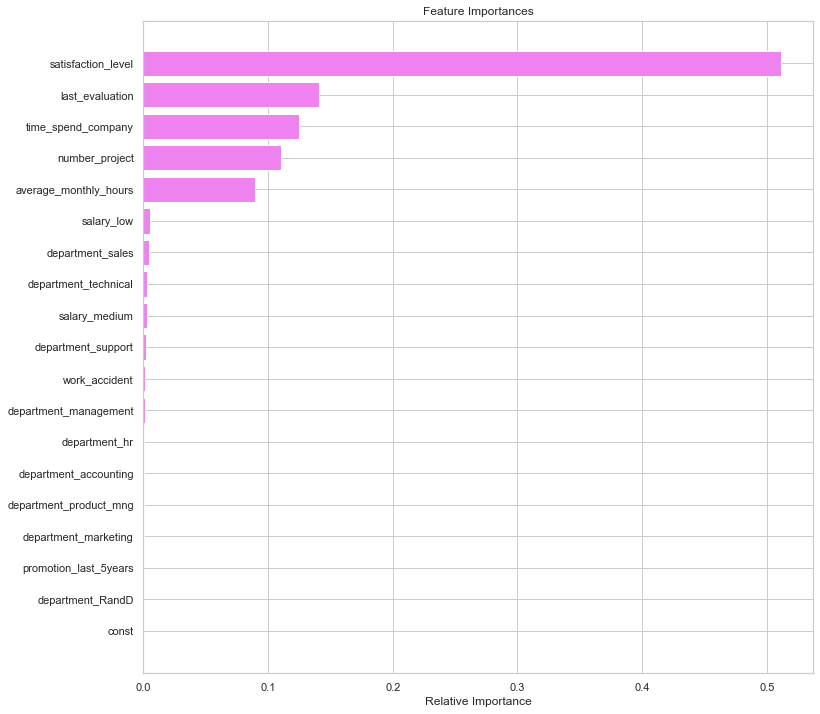

In [110]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- According to the decision tree model, the employees' Satisfaction level, last evaluation, the time they spend at the company,the number of projects they worked and their average monthly hours are the top 5 important variables for predicting whether the employee will leave the company.

### Reducing over fitting

#### Using GridSearch for Hyperparameter tuning of our tree model

In [111]:
dTree_short = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=1)
dTree_short.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [112]:
#Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier(class_weight={0:0.35,1:0.65},random_state=1) # using reverse class weights

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,8,1), 
              'min_samples_leaf': [5, 7, 10],
              'max_leaf_nodes' : [3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,n_jobs=-3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=2,
                       max_leaf_nodes=3, min_impurity_decrease=0.0001,
                       min_samples_leaf=5, random_state=1)

### Confusion Matrix (decision tree with tuned hyperparameters)

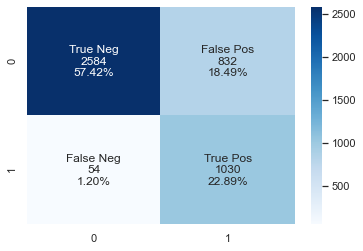

In [113]:
make_confusion_matrix(dtree_tuned, X_test, y_test)

In [114]:
print("dtree_tuned_training performance")
model_performance_classification(dtree_tuned, X_train, y_train)

dtree_tuned_training performance


,Accuracy,Recall,Precision,F1
0,0.811792,0.961801,0.559794,0.707692


In [115]:
print("dtree_tuned test performance")
model_performance_classification(dtree_tuned, X_test, y_test)

dtree_tuned test performance


,Accuracy,Recall,Precision,F1
0,0.803111,0.950185,0.553169,0.699253


## Visualizing the tuned Decision Tree

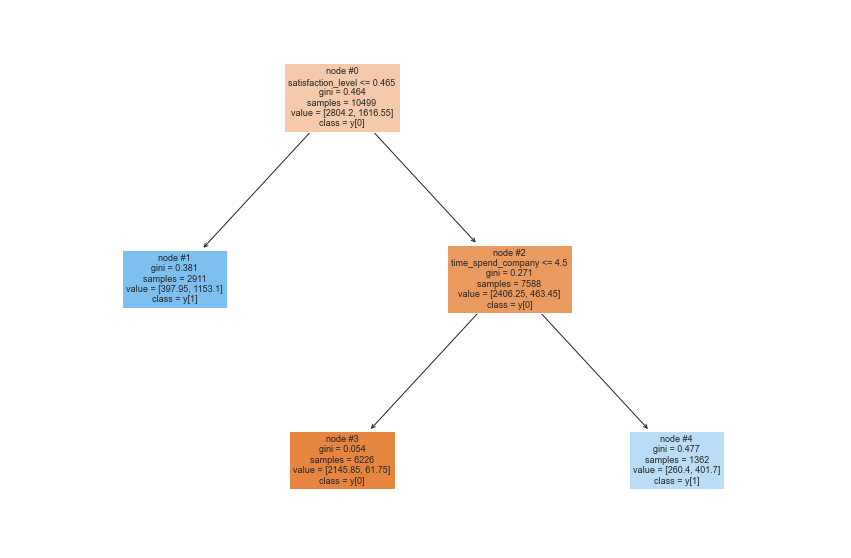

In [116]:
plt.figure(figsize=(15, 10))

tree.plot_tree(
    dtree_tuned,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [117]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dtree_tuned, feature_names=feature_names, show_weights=True))

|--- satisfaction_level <= 0.47
|   |--- weights: [397.95, 1153.10] class: 1
|--- satisfaction_level >  0.47
|   |--- time_spend_company <= 4.50
|   |   |--- weights: [2145.85, 61.75] class: 0
|   |--- time_spend_company >  4.50
|   |   |--- weights: [260.40, 401.70] class: 1



### Comparing all the models

In [118]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_performance_LogReg(lg, X_train, y_train).T,
        model_performance_LogReg(lg, X_train, y_train, threshold=0.2).T,
        model_performance_classification(dTree, X_test, y_test).T,
        model_performance_classification(dtree_tuned, X_train, y_train).T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression-threshold 0.2",
    "Decision tree",
    "Decision tree tuned",
]
print("training performance comparison:")
models_train_comp_df

training performance comparison:


,Logistic Regression,Logistic Regression-threshold 0.2,Decision tree,Decision tree tuned
Accuracy,0.797695,0.705877,0.977333,0.811792
Recall,0.366707,0.798955,0.952952,0.961801
Precision,0.624230,0.434317,0.952952,0.559794
F1,0.462006,0.562730,0.952952,0.707692


- A tuned decision tree is the best model for our data as it has the highest test recall and gives a generalized performance compared to other models. The F1 and Precision are higher in the Decision tree before tuning. But we are not interested in a high Precision or F1, and the most critical concern for the company is to identify leaving employees as much as possible, which needs low FN and high recall.

In [119]:
# Text report showing the rules of a decision tree -
feature_names = list(X_train.columns)
print(tree.export_text(dtree_tuned,feature_names=feature_names,show_weights=True))

|--- satisfaction_level <= 0.47
|   |--- weights: [397.95, 1153.10] class: 1
|--- satisfaction_level >  0.47
|   |--- time_spend_company <= 4.50
|   |   |--- weights: [2145.85, 61.75] class: 0
|   |--- time_spend_company >  4.50
|   |   |--- weights: [260.40, 401.70] class: 1



In [120]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        dtree_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                             Imp
satisfaction_level      0.666522
time_spend_company      0.333478
const                   0.000000
department_management   0.000000
salary_low              0.000000
department_technical    0.000000
department_support      0.000000
department_sales        0.000000
department_product_mng  0.000000
department_marketing    0.000000
department_accounting   0.000000
department_hr           0.000000
department_RandD        0.000000
promotion_last_5years   0.000000
work_accident           0.000000
average_monthly_hours   0.000000
number_project          0.000000
last_evaluation         0.000000
salary_medium           0.000000


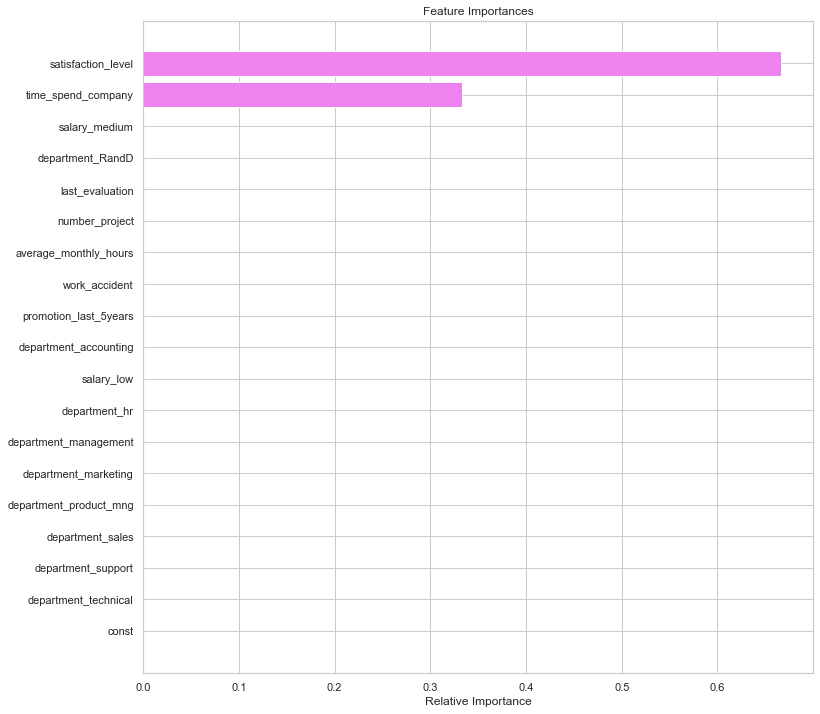

In [121]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- It can be seen that Satisfaction level is the most important feature, followed by their time spent in the company
- The tuned decision tree is using only two variables to separate the two classes.

## Conclusion

- It can be seen the two variables - Satisfaction level and Time spent in the company are the most important predictors in identifying employees who are leaving the company. Also, other variables' importance is not significant.
- The company can use the model to recognize the leaving employees. This would help them stop their valued employees from quitting. Resigning each employee would cost the company money, resources, and skill.

##### The decision tree rules:

- Employees with a satisfaction level <= 0.47 are more likely to quit.
- Employees who have worked for the company > 4.50 years have a higher risk of leaving.
- Generally, the employees who are not satisfied and stayed more than 4.5 years in the company have more intention of leaving. On the other hand, the employees who have been with the company for less than 4.5 years and are satisfied with the job may not resign.